<a href="https://colab.research.google.com/github/angel442002/repositorio_tareas/blob/main/Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Práctica 2</h1>
<h2>Regresión</h2>


<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/P2-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


En esta práctica realizarás la tarea de regresión para predecir el precio de casas en el dataset [Ames Housing](https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset).

El dataset Ames Housing contiene información sobre ventas de viviendas en Ames, Iowa, entre 2006 y 2010. Incluye 80 variables (numéricas y categóricas) que describen características de las casas, como área habitable, calidad, año de construcción, y ubicación. La variable objetivo es SalePrice (precio de venta). Tiene 2,930 observaciones y es comúnmente usado para practicar modelos de regresión en machine learning.

In [ ]:
import pandas as pd

url = "https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/AmesHousing.csv"
df = pd.read_csv(url)
df.drop(columns=["Order","PID"], inplace=True)
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


🔴 Verifica si hay datos faltantes, en caso de que sí, realiza la imputación usando la estrategia que elijas.

In [ ]:
#Vemos y sumamos
faltantes= df.isnull().sum()
faltantes


,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
Lot Area,0
Street,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


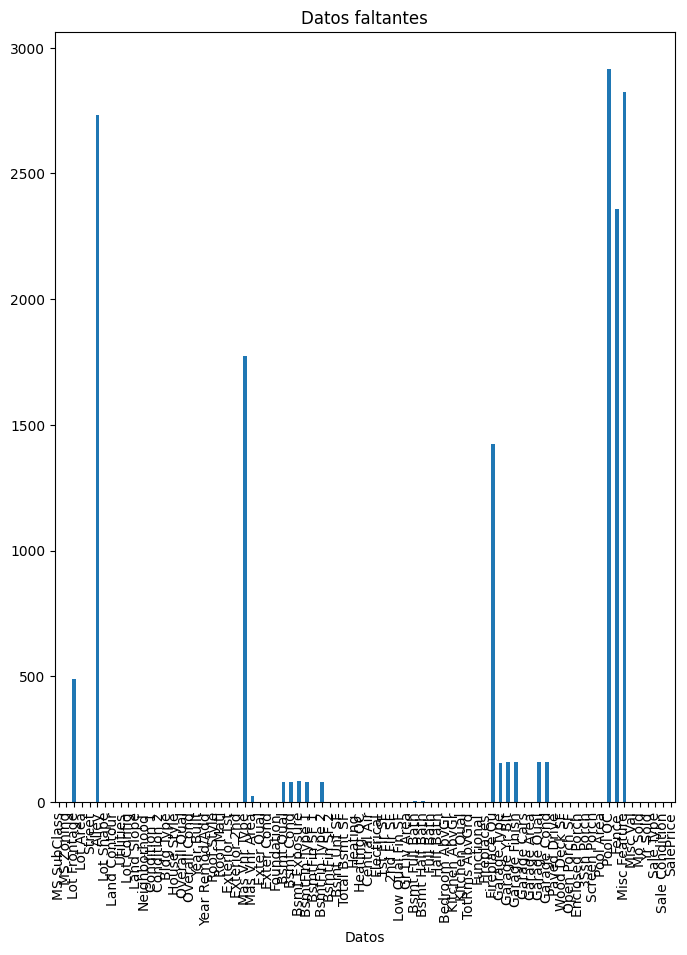

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,10))
faltantes.plot(kind='bar')
plt.title("Datos faltantes")
plt.xlabel("Datos")
plt.show()

In [ ]:
#Imputamos los datos de una vez para facilidad como en la práctica anterior
#Separamos datos
numtipo=df.select_dtypes(include=['int64', 'float64']).columns
colu=df.select_dtypes(include=['object']).columns

#Imutamos por mediana y moda
for col in numtipo:
  if df[col].isnull().sum()>0:
    df[col].fillna(df[col].median(), inplace=True)

for col in colu:
  if df[col].isnull().sum()>0:
    df[col].fillna(df[col].mode()[0], inplace=True)

#Verificamos
df.isnull().sum()

,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
Lot Area,0
Street,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


🔴 Usando el método `describe` del dataframe, observa los rangos de cada variable numérica.

* ¿Cuál es la variable con los valores más altos?
* ¿Cuál es la variable con el rango de valores más angosto?

In [ ]:
describe1=df[numtipo].describe().T #Sacamos la transpuesta para mejor visualización
describe1['range']=describe1['max']-describe1['min']
describe1.sort_values(by='range', ascending=False)
#Vemos la variable con valores mas altos
valor_mas_alto=describe1.sort_values(by="max",ascending=False).head(1)
valor_mas_alto

,count,mean,std,min,25%,50%,75%,max,range
SalePrice,2930.0,180796.060068,79886.692357,12789.0,129500.0,160000.0,213500.0,755000.0,742211.0


In [ ]:
#El mas angosto
valor_angosto=describe1.sort_values(by="range",ascending=True).head(1)
valor_angosto

,count,mean,std,min,25%,50%,75%,max,range
Half Bath,2930.0,0.379522,0.502629,0.0,0.0,0.0,1.0,2.0,2.0


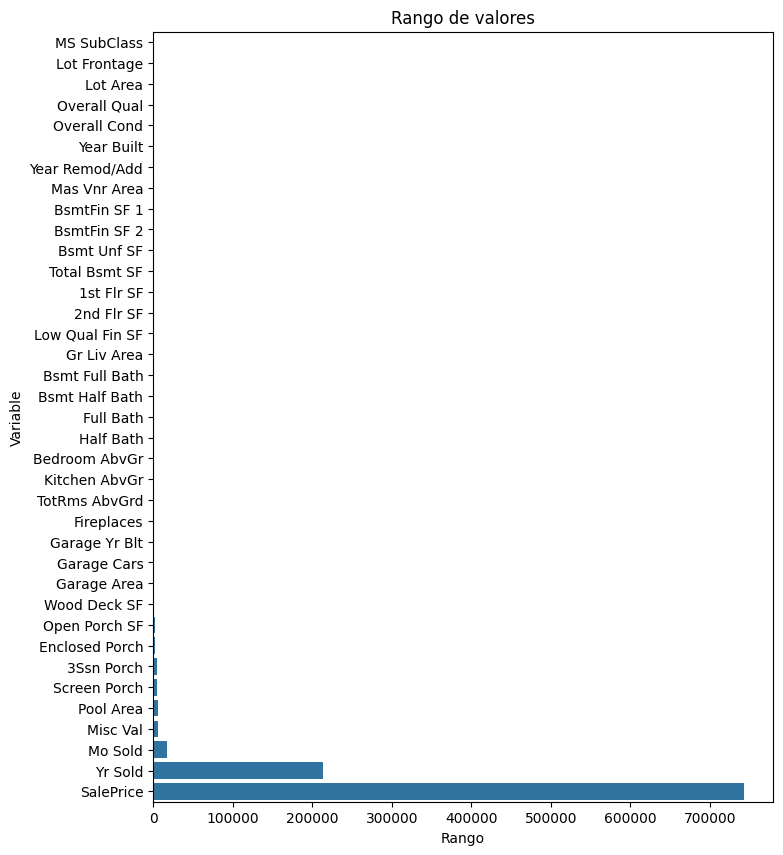

In [ ]:
#Visualizamos
import seaborn as sns
plt.figure(figsize=(8,10))
sns.barplot(data=describe1.sort_values(by="range",ascending=True),x="range", y=describe1.index)
plt.title("Rango de valores")
plt.xlabel("Rango")
plt.ylabel("Variable")
plt.show()

Examina la correlación entre variables. **Observa que aquí está también la variable target**

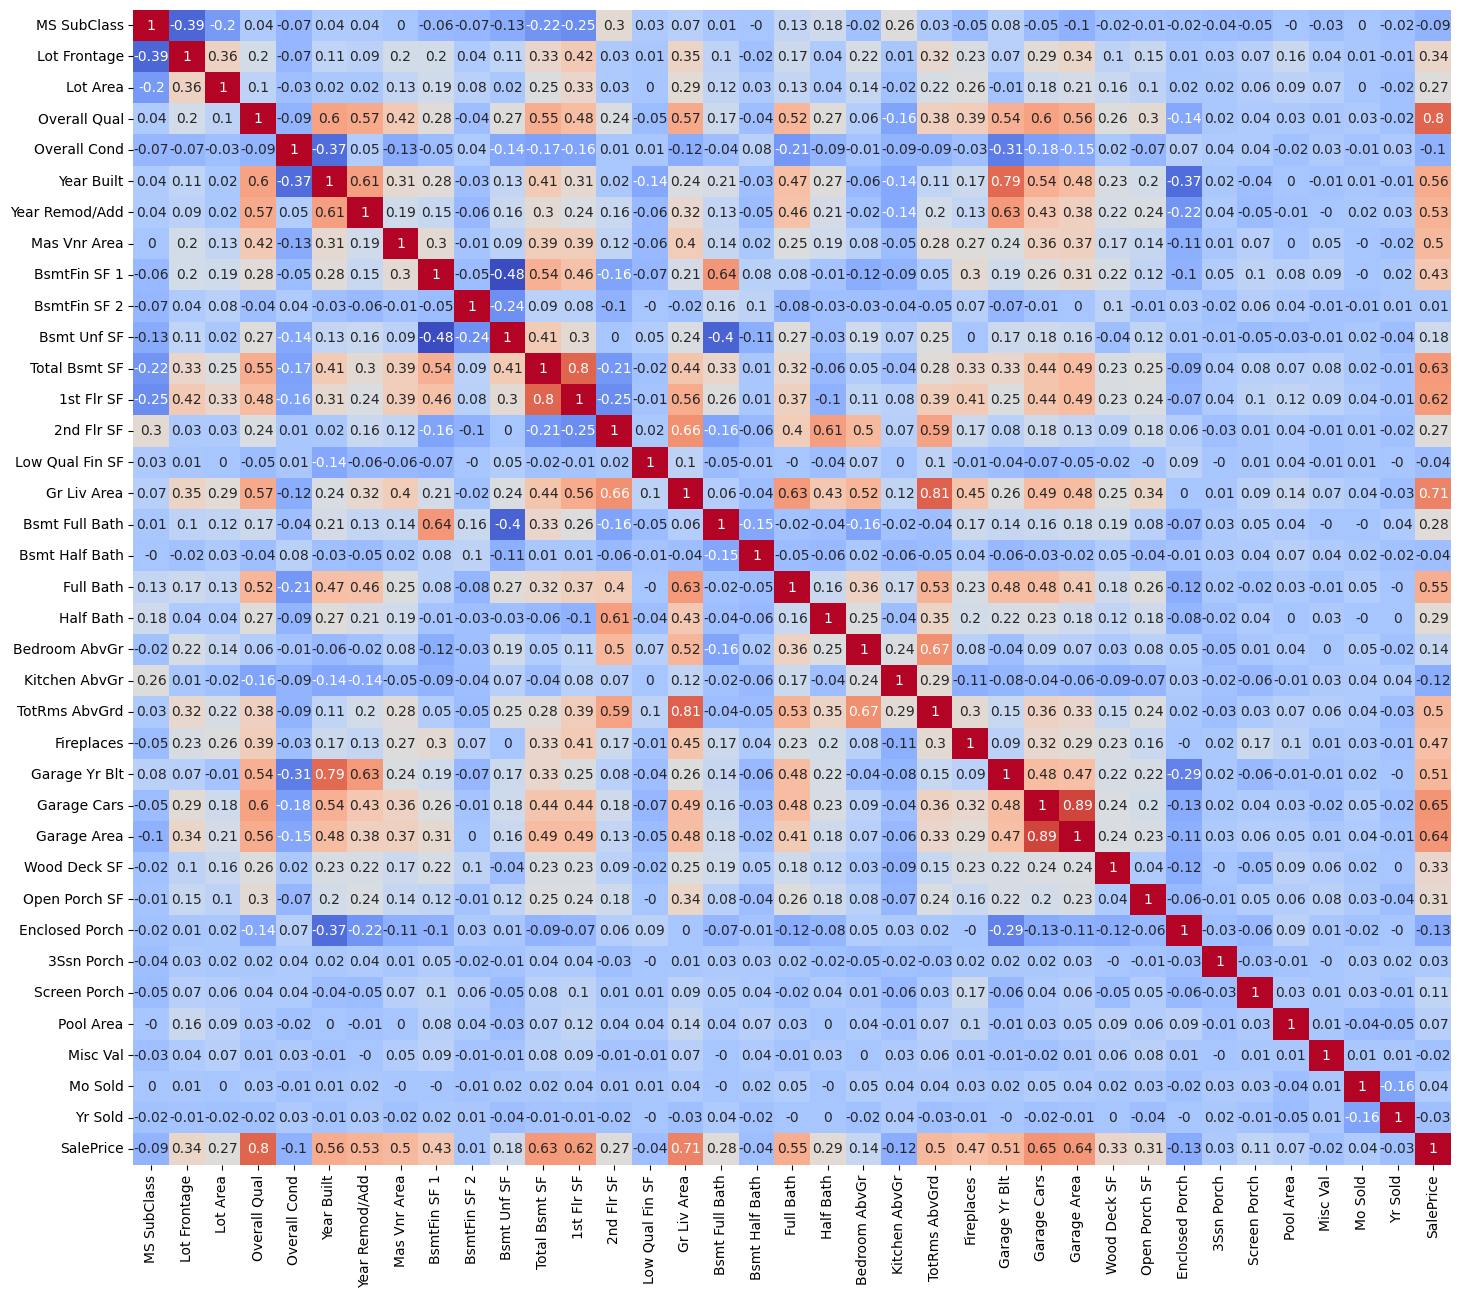

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df.select_dtypes(include=['int64', 'float64'])  # Sólo queremos considerar las variables numéricas para este análisis
corr_mat = df_numeric.corr().round(2)

plt.figure(figsize=(17, 15))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm',cbar=False)
plt.show()

🔴 Responde aquí: ¿Cuáles son las parejas de variables que presentan el **problema** de multicolinealidad?

De cada grupo de variables con multicolinealidad quédate sólo con una de ellas y elimina la(s) otra(s).

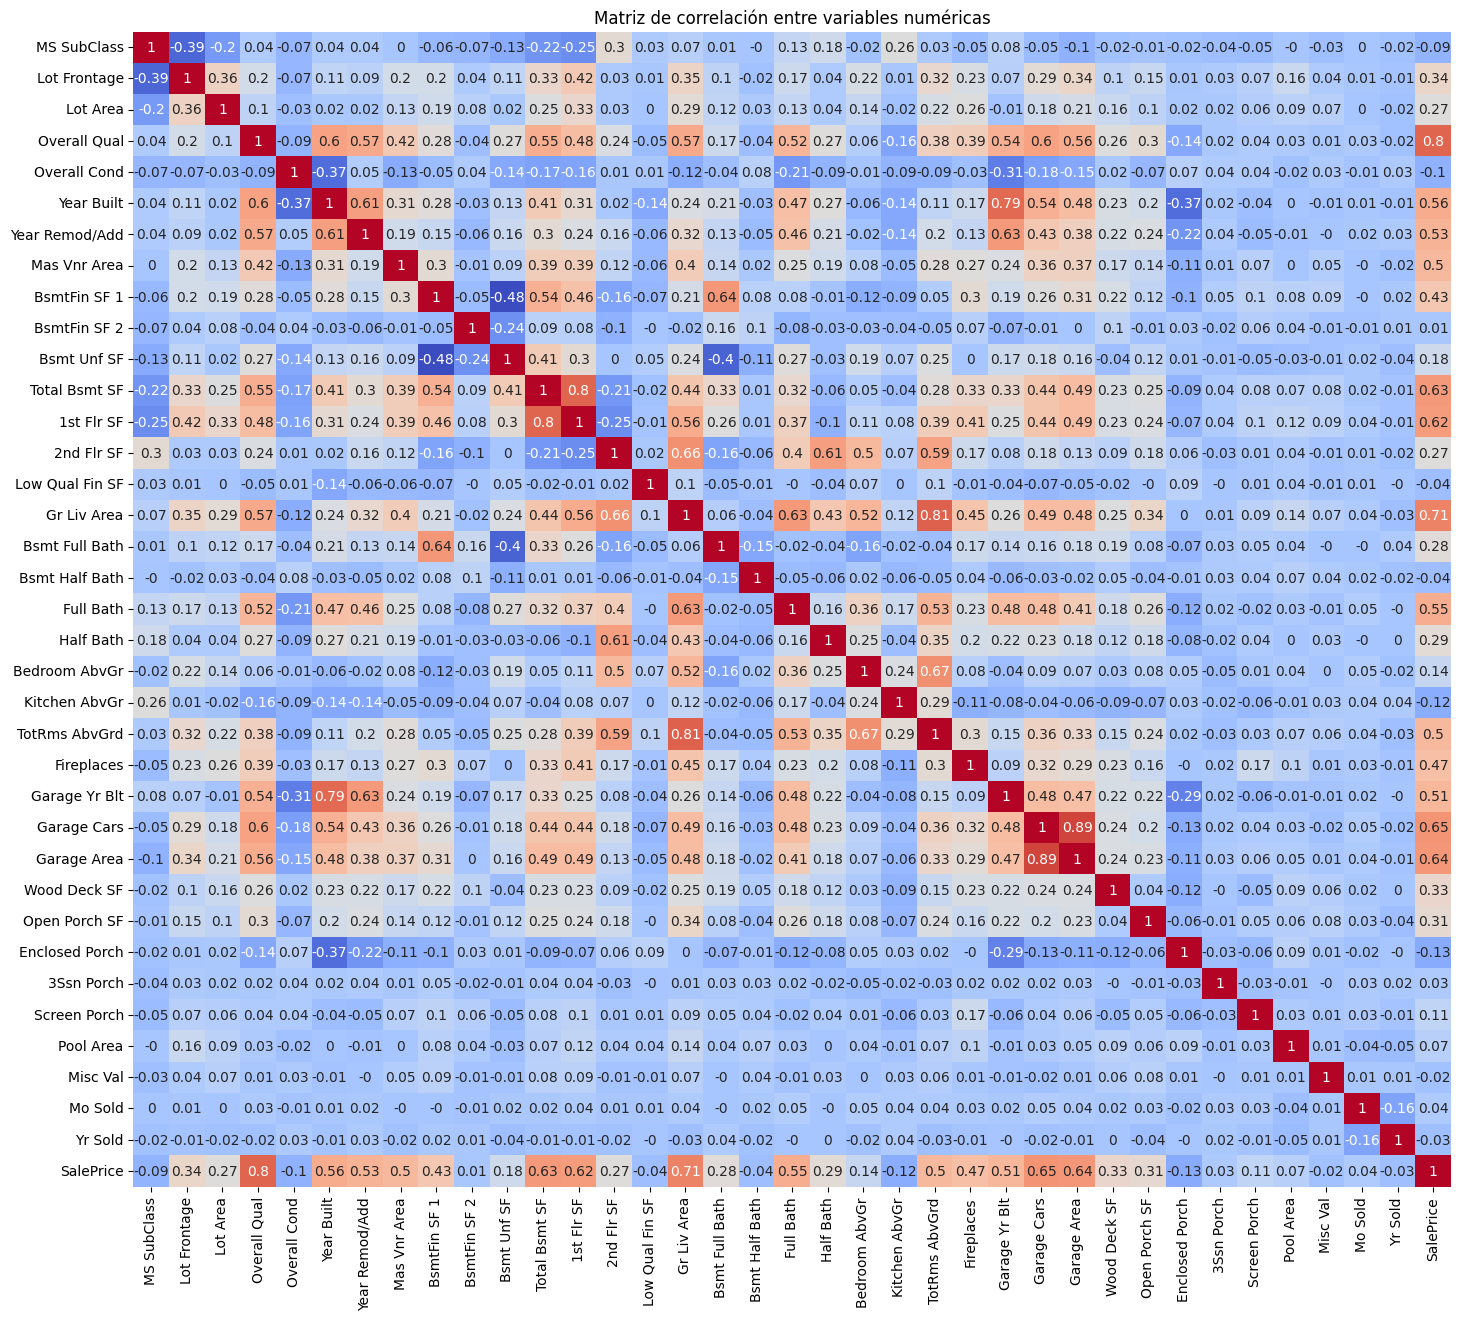

,Variable 1,Variable 2,Correlación
1,Garage Area,Garage Cars,0.89
0,TotRms AbvGrd,Gr Liv Area,0.81


In [ ]:
#Vamos a detectar la multicolinealidad
numeric = df.select_dtypes(include=['int64', 'float64'])
correlacion = df_numeric.corr().round(2)

plt.figure(figsize=(17, 15))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', cbar=False)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

# Parejas con alta correlación (> 0.8)
parejas_correlacionadas = []

for i in range(len(correlacion.columns)):
    for j in range(i):
        if abs(correlacion.iloc[i, j]) > 0.8:
            col1 = correlacion.columns[i]
            col2 = correlacion.columns[j]
            parejas_correlacionadas.append((col1, col2, correlacion.iloc[i, j]))

parejascdf = pd.DataFrame(parejas_correlacionadas, columns=["Variable 1", "Variable 2", "Correlación"])
parejascdf.sort_values(by="Correlación", ascending=False)


In [ ]:
print(df.columns.tolist())

['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Ar

🔴 Observa las relaciones entre las variables numéricas predictoras y la variable target:

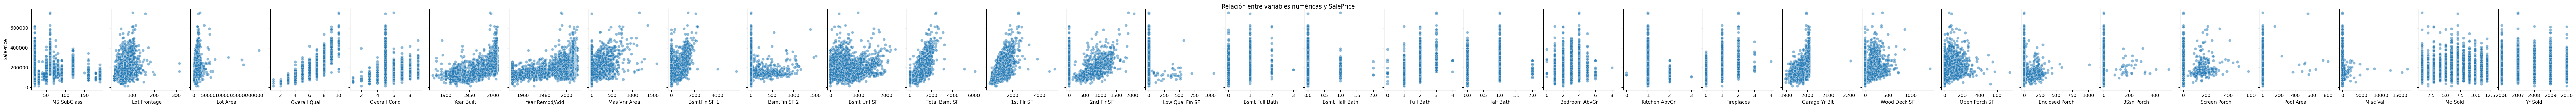

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Crear pair plot (relación entre variables numéricas y 'SalePrice')
sns.pairplot(
    data=df[numeric_cols],
    y_vars=['SalePrice'],          # Variable objetivo
    x_vars=numeric_cols.drop('SalePrice'),  # Todas las numéricas excepto target
    height=3,
    aspect=0.8,
    plot_kws={'alpha': 0.5}
)

plt.suptitle('Relación entre variables numéricas y SalePrice', y=1.02)
plt.show()

🔴 Elige una variable que consideres que tiene mucha relación con la variable target y eliminala.

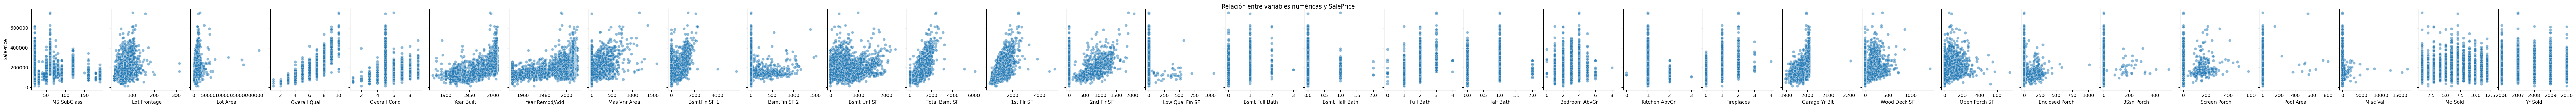

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(
    data=df[numeric_cols],
    y_vars=['SalePrice'],
    x_vars=numeric_cols.drop('SalePrice'),
    height=3,
    aspect=0.8,
    plot_kws={'alpha': 0.5}
)

plt.suptitle('Relación entre variables numéricas y SalePrice', y=1.02)
plt.show()


🔴 Aplica la codificación *one-hot* a las variables categóricas. Usa la opción `drop_first=True` para evitar la multicolinealidad en las variables binarias resultantes.

In [ ]:
encoded = pd.get_dummies(df, drop_first=True)


🔴 Realiza las siguientes acciones:

1. Haz una división train/test con la proporción 80%/20%.
2. Define un pipeline con los siguientes pasos:
 * Escalador
 * Selector de features
 * Polinomial Features, elige el grado que consideres necesario (si eliges un valor muy alto puede ser muy tardado el proceso).
 * Algoritmo de regresión lineal ElasticNet.
3. Entrena con el conjunto de entrenamiento y muestra el coeficiente $R^2$ en el conjunto de entrenamiento y prueba.
4. Obten las predicciones para el conjunto de prueba.
5. Evalua el rendimiento usando las métricas MAE, MAPE y [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html). Esta última no la hemos usado hasta el momento, es otra medición de qué tan alejados están las predicciones del valor real, entre más bajo es mejor.

🔴 Repite el experimento del punto anterior cambiando el algoritmo por alguno de los siguientes:
* [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
* [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import mean_squared_error
import numpy as np

# División
X = encoded.drop("SalePrice", axis=1)
y = encoded["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("selector", SelectKBest(score_func=f_regression, k=50)),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000))
])

pipe.fit(X_train, y_train)

# Evaluación
r2_train = pipe.score(X_train, y_train)
r2_test = pipe.score(X_test, y_test)

print(f"R² entrenamiento: {r2_train:.3f}")
print(f"R² prueba: {r2_test:.3f}")

# Predicciones
y_pred = pipe.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"RMSE: {rmse:.2f}")


R² entrenamiento: 0.967
R² prueba: 0.884
MAE: 19428.36
MAPE: 11.18%
RMSE: 30493.78


Para SVR

In [ ]:
from sklearn.svm import SVR

pipe_svr = Pipeline([
    ("scaler", StandardScaler()),
    ("selector", SelectKBest(score_func=f_regression, k=50)),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", SVR(C=100, epsilon=0.2))
])

pipe_svr.fit(X_train, y_train)

r2_svr_train = pipe_svr.score(X_train, y_train)
r2_svr_test = pipe_svr.score(X_test, y_test)

print(f"SVR R² entrenamiento: {r2_svr_train:.3f}")
print(f"SVR R² prueba: {r2_svr_test:.3f}")

y_pred_svr = pipe_svr.predict(X_test)

print(f"SVR MAE: {mean_absolute_error(y_test, y_pred_svr):.2f}")
print(f"SVR MAPE: {mean_absolute_percentage_error(y_test, y_pred_svr):.2%}")
print(f"SVR RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svr)):.2f}")


SVR R² entrenamiento: 0.019
SVR R² prueba: -0.027
SVR MAE: 61024.95
SVR MAPE: 31.77%
SVR RMSE: 90760.64


Y por último, K-NN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("selector", SelectKBest(score_func=f_regression, k=50)),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", KNeighborsRegressor(n_neighbors=5))
])

pipe_knn.fit(X_train, y_train)

r2_knn_train = pipe_knn.score(X_train, y_train)
r2_knn_test = pipe_knn.score(X_test, y_test)

print(f"k-NN R² entrenamiento: {r2_knn_train:.3f}")
print(f"k-NN R² prueba: {r2_knn_test:.3f}")

y_pred_knn = pipe_knn.predict(X_test)

print(f"k-NN MAE: {mean_absolute_error(y_test, y_pred_knn):.2f}")
print(f"k-NN MAPE: {mean_absolute_percentage_error(y_test, y_pred_knn):.2%}")
print(f"k-NN RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn)):.2f}")

k-NN R² entrenamiento: 0.844
k-NN R² prueba: 0.810
k-NN MAE: 25117.42
k-NN MAPE: 13.05%
k-NN RMSE: 39008.05
